# Imports and Setup

In [1]:
# import libraries
import torch
import torch.optim as optim
import torch.nn as nn
from collections import deque
import gym
import numpy as np
import cv2
import random

In [2]:
!pip install numpy
!pip install cloudpickle

In [3]:
!pip install setuptools==65.5.0 "wheel<0.40.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.43.0
    Uninstalling wheel-0.43.0:
      Successfully uninstalled wheel-0.43.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.4 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.


In [4]:
!pip3 install gym==0.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gym: filename=gym-0.18.0-py3-none-any.whl size=1656422 sha256=d97bf2f54ca7de2b74ec403a5d7ce48de43b494bedbb66cef2abe28e975b4af7
  Stored in directory: /root/.cache/pip/wheels/d5/bb/4f/8105b5d892d04707509d2e931b22e0221a214a1a061c84b741
  Created wheel for Pillow: filename=Pillow-7.2.0-cp310-cp310-linux_x86_64.whl size=1140126 sha256=efbbd54a0949362b3922873a23b5c87571ec515c046fb218a6cc9bc5f88cd18a
  Stored in directory: /root/.cache/pip/wheels/fd/5c/a6/0ab3157e7e4a0ba139bd89cb1edbe0f87876cf55ef31b05d6a
Successfully built gym Pillow
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successful

In [5]:
!python -m atari_py.import_roms /Users/mubariz/Downloads/Atari-2600-VCS-ROM-Collection

/usr/bin/python3: Error while finding module specification for 'atari_py.import_roms' (ModuleNotFoundError: No module named 'atari_py')


In [6]:
!pip install gym[atari]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.6/540.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for atari-py: filename=atari_py-0.2.9-cp310-cp310-linux_x86_64.whl size=2870648 sha256=9fc46b93944c5dca8e1e8b7a56bef784abf18e7361657b5f741ec2f5ee3e6976
  Stored in directory: /root/.cache/pip/wheels/75/6f/04/1f3bf5255580101e16ff487564354dddcdd23ec3b43b775b7a
Successfully built atari-py


In [7]:
import gym

In [8]:
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
!pip install unrar
!unrar x Roms.rar
!mkdir rars
!mv HC\ ROMS.zip   rars
!mv ROMS.zip  rars
!python -m atari_py.import_roms rars

Streaming output truncated to the last 5000 lines.
Extracting  ROMS/Barnstorming (1982) (Activision, Steve Cartwright) (AX-013) ~.bin       3%  OK 
Extracting  ROMS/Barnstorming (CCE).bin                                    3%  OK 
Extracting  ROMS/Barnstorming (Unknown) (PAL) [a].bin                      3%  OK 
Extracting  ROMS/Barnstorming (Unknown) (PAL).bin                          3%  OK 
Extracting  ROMS/Barnstorming - Die tollkeuhnen Flieger (1982) (Activision, Steve Cartwright - Ariola) (EAX-013, PAX-013 - 711 013-720) (PAL).bin       3%  OK 
Extracting  ROMS/Base Attack (1983) (Home Vision - Gem International Corporation - VDI) (VCS83113) (PAL) ~.bin       3%  OK 
Extracting  ROMS/Base Attack (Hack) (Unknown).bin                          3%  OK 
Extracting  ROMS/Baseball (AKA Super Challenge Baseball) (1988) (Telegames) (5665 A016) (PAL).bin       3%  OK 
Extracting  ROMS/Baseball (AKA Super Challenge Base

In [9]:
!pip install "gymnasium[atari, accept-rom-license]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.2 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446659 sha256=ee95c2e1672860ecad4caca9093f14a8ff5e1352725ebc3efe8dfbdf94956487
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [10]:
!pip install gym[atari]
!pip install autorom[accept-rom-license]

# DQN


The DeepQNetwork class is a neural network model used for deep Q-learning, inheriting from nn.Module. It is initialized with the input shape of the state space (input_shape) and the number of possible actions (num_actions). The network architecture consists of three convolutional layers followed by two fully connected layers. The convolutional layers extract spatial features from the input, while the fully connected layers process these features to output Q-values for each action. The forward method defines how input data passes through the network, flattening the output of the convolutional layers before passing it to the fully connected layers. The select_action method implements an epsilon-greedy policy for action selection, balancing exploration and exploitation by selecting a random action with probability epsilon or the action with the highest Q-value otherwise.

In [ ]:
class DeepQNetwork(nn.Module):
    def __init__(self, input_shape, num_actions):
        super(DeepQNetwork, self).__init__()

        self.input_shape = input_shape
        self.num_actions = num_actions

        # Define the convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )

        # Define the fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(7 * 7 * 64, 512),
            nn.ReLU(),
            nn.Linear(512, self.num_actions)
        )

    def forward(self, x):
        # Pass input through convolutional layers
        x = self.conv_layers(x)
        # Flatten the output from conv layers
        x = x.view(x.size(0), -1)
        # Pass the flattened output through fully connected layers
        x = self.fc_layers(x)
        return x

    def select_action(self, state, epsilon):
        """
        Select an action using epsilon-greedy policy
        """
        # With probability epsilon, select a random action
        if random.random() < epsilon:
            action = random.randrange(self.num_actions)
        else:
            # Otherwise, select the action with the highest Q-value
            state_tensor = torch.FloatTensor(np.float32(state)).unsqueeze(0).to(device)
            q_values = self.forward(state_tensor)
            action = q_values.max(1)[1].item()
        return action

# Replay Buffer

The ExperienceReplayBuffer class manages and stores experiences for training a reinforcement learning agent. Initialized with a fixed maximum capacity (max_capacity), it uses a deque to efficiently handle the buffer size. The store_experience method saves individual experiences—consisting of the state, action, reward, next state, and a done flag—by expanding the state dimensions and appending the tuple to the buffer. The sample_batch method randomly samples a specified number of experiences (batch_size) from the buffer, returning concatenated arrays of states, actions, rewards, next states, and done flags. The __len__ method returns the current number of stored experiences, aiding in buffer management and capacity checks.

In [ ]:
import random
import numpy as np
from collections import deque

class ExperienceReplayBuffer:
    def __init__(self, max_capacity):
        """
        Initialize the replay buffer with a fixed maximum capacity.

        Parameters:
        max_capacity (int): Maximum number of experiences the buffer can hold.
        """
        self.memory = deque(maxlen=max_capacity)

    def store_experience(self, state, action, reward, next_state, done):
        """
        Store a single experience tuple in the buffer.

        Parameters:
        state (np.array): The initial state.
        action (int): The action taken.
        reward (float): The reward received.
        next_state (np.array): The resulting state after taking the action.
        done (bool): Flag indicating if the episode is done.
        """
        # Expand dimensions to match the input shape expected by the model
        state = np.expand_dims(state, 0)
        next_state = np.expand_dims(next_state, 0)

        # Append the experience tuple to the buffer
        self.memory.append((state, action, reward, next_state, done))

    def sample_batch(self, batch_size):
        """
        Sample a random batch of experiences from the buffer.

        Parameters:
        batch_size (int): Number of experiences to sample.

        Returns:
        tuple: A tuple containing batches of states, actions, rewards, next states, and done flags.
        """
        states, actions, rewards, next_states, dones = zip(*random.sample(self.memory, batch_size))

        # Concatenate the arrays to form the final batch
        return np.concatenate(states), actions, rewards, np.concatenate(next_states), dones

    def __len__(self):
        """
        Return the current size of the buffer.

        Returns:
        int: Number of experiences currently stored in the buffer.
        """
        return len(self.memory)


# Utils

The train_agent function trains a neural network in a specified environment using a replay buffer and an optimizer. Parameters include the environment (env), the neural network (network), the optimizer (optim), the replay buffer (buffer), and the device for computations (device). The function tracks total steps, rewards per episode, and training losses. It sets the network to training mode and follows an epsilon-greedy policy to select actions, stores experiences in the buffer, and updates the network using sampled experiences once the buffer is sufficiently filled. It periodically saves the model and plots training statistics. The environment is closed after training.

The evaluate_agent function evaluates the performance of a trained model in an environment over a specified number of episodes. Parameters include the environment (env), the trained model (model), the number of episodes (num_episodes), whether to render the environment (render), the device for computations (device), and an optional context string for saving videos (context). The function wraps the environment for video recording, sets the model to evaluation mode, and runs the specified number of episodes, rendering the environment and printing the reward for each episode. The environment is closed after evaluation.

In [ ]:
def train_agent(env, network, optim, buffer, device=device):
    """
    Train the neural network on the environment using a replay buffer and optimizer.

    Parameters:
    env (gym.Env): The environment to train the model on.
    network (torch.nn.Module): The neural network to be trained.
    optim (torch.optim.Optimizer): The optimizer for training the network.
    buffer (ReplayBuffer): The replay buffer to store and sample experiences.
    device (torch.device): The device to run computations on.
    """
    total_steps = 0
    rewards_per_episode = []
    training_losses = []

    # Set the network to training mode
    network.train()

    for ep in range(NUM_EPISODES):
        state = env.reset()
        ep_reward = 0.0

        while True:
            # Compute epsilon for the epsilon-greedy policy
            epsilon = EPS_FINAL + (EPS_INITIAL - EPS_FINAL) * np.exp(-total_steps / EPS_DECAY_RATE)

            # Select an action using the network's policy
            action = network.choose_action(state, epsilon, device)
            total_steps += 1

            # Execute the action in the environment
            next_state, reward, done, _ = env.step(action)

            # Store the experience in the replay buffer
            buffer.push(state, action, reward, next_state, done)

            # Update the current state and accumulate the reward
            state = next_state
            ep_reward += reward

            # Check if the buffer is sufficiently filled to start training
            if len(buffer) > MIN_BUFFER_SIZE:
                loss = compute_loss(network, buffer, BATCH_SIZE, DISCOUNT_FACTOR, device)

                # Perform a gradient descent step
                optim.zero_grad()
                loss.backward()
                optim.step()

                training_losses.append(loss.item())

            # Plot statistics periodically
            if total_steps % 10000 == 0:
                plot_statistics(total_steps, rewards_per_episode, training_losses)

            # Break the loop if the episode is done
            if done:
                rewards_per_episode.append(ep_reward)
                break

        # Save the model weights periodically
        if (ep + 1) % 500 == 0:
            save_path = os.path.join(MODEL_DIR, f"{env.spec.id}_episode_{ep + 1}.pth")
            print(f"Saving model at Episode {ep + 1} ...")
            torch.save(network.state_dict(), save_path)

    # Close the environment
    env.close()

def evaluate_agent(env, model, num_episodes, render=True, device=device, context=""):
    """
    Evaluate the performance of the trained model on the environment.

    Parameters:
    env (gym.Env): The environment to evaluate the model on.
    model (torch.nn.Module): The trained model to be evaluated.
    num_episodes (int): Number of episodes to run for evaluation.
    render (bool): Whether to render the environment.
    device (torch.device): The device to run computations on.
    context (str): Context string for video saving.
    """
    # Wrap the environment for video recording
    env = gym.wrappers.Monitor(env, VIDEO_DIR + f'dqn_{env.spec.id}_video_{context}')

    # Set the model to evaluation mode
    model.eval()

    for ep in range(num_episodes):
        state = env.reset()
        ep_reward = 0.0

        while True:
            # Select an action using the model
            action = model.choose_action(state, 0, device)
            next_state, reward, done, _ = env.step(action)

            # Render the environment if specified
            if render:
                env.render()
                time.sleep(0.02)

            ep_reward += reward
            state = next_state

            if done:
                print(f"Episode {ep + 1} finished with reward {ep_reward}")
                break

    # Close the environment
    env.close()

# Hyperparameters

This section outlines the configuration parameters for training a deep Q-learning agent. The number of training episodes is set to 500 (NUM_EPISODES). The batch size for sampling from the replay buffer is increased to 64 (BATCH_SIZE), enhancing the learning stability. The discount factor for computing future rewards is set at 0.95 (DISCOUNT_FACTOR), balancing the weighting of immediate and future rewards. The epsilon-greedy exploration strategy starts with an initial epsilon value of 1.0 (INITIAL_EPSILON) and decays to a minimum value of 0.1 (MINIMUM_EPSILON) over 25,000 steps (EPSILON_DECAY_RATE). Training begins only after the replay buffer has accumulated a minimum of 5,000 transitions (MIN_REPLAY_SIZE), with a total buffer capacity set to 50,000 transitions (REPLAY_BUFFER_CAPACITY).

In [ ]:
# Define the number of episodes to run
NUM_EPISODES = 800

# Define the batch size for training
TRAIN_BATCH_SIZE = 32

# Discount factor for future rewards
DISCOUNT_FACTOR = 0.99

# Starting value of epsilon for epsilon-greedy policy
EPSILON_INITIAL = 1.0

# Ending value of epsilon for epsilon-greedy policy
EPSILON_FINAL = 0.01

# Decay rate for epsilon
EPSILON_DECAY_RATE = 30000

# Minimum size of replay buffer to start training
REPLAY_START_SIZE = 10000

# Maximum size of replay buffer
MAX_REPLAY_BUFFER_SIZE = 10 * REPLAY_START_SIZE

# Main

This section configures and initializes the Atari environment and deep Q-learning models for training on the game Pong. The environment ID is set to "PongNoFrameskip-v4" (env_id), and the environment is created using make_atari_env(env_id). The action space and corresponding action meanings of the environment are printed for reference. The shape of the observation space and the number of actions are retrieved and used to initialize both the current and target DQN models (current_model and target_model) with these dimensions. The models are moved to the specified device (device). An Adam optimizer is initialized for the current model with a learning rate of 0.0001. A replay buffer is created with the defined capacity (REPLAY_BUFFER_CAPACITY). Finally, the state dictionary of the current model is copied to the target model to synchronize their initial weights.

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
env_id = "PongNoFrameskip-v4"
env = make_atari_env(env_id)

In [ ]:
# Instantiate the DQN model using the environment's observation and action spaces
policy_network = DQN(env.observation_space.shape, env.action_space.n).to(device)

# Configure the optimizer with a specified learning rate
policy_optimizer = optim.Adam(policy_network.parameters(), lr=0.00001)

# Create the replay buffer with the designated capacity
memory_buffer = ExperienceBuffer(MEMORY_SIZE)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Training and Results

This line initiates the training process of the deep Q-learning agent using the train_modif function. It takes several arguments: the environment (env), the current DQN model (current_model), the target DQN model (target_model), the optimizer (optimizer), the replay buffer (replay_buffer), and the device on which computations will be performed (device). This setup ensures that the agent interacts with the environment, learns from stored experiences, and updates its policy to maximize cumulative rewards.

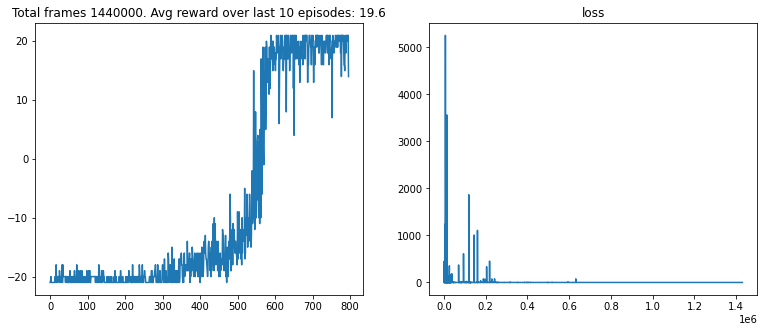

Saving weights at Episode 800 ...


In [ ]:
train(env, model, optimizer, replay_buffer, device)

In [5]:
from IPython.display import HTML
from base64 import b64encode

def show_videos(video_path1, video_path2, video_path3, title1='Video 1', title2='Video 2', title3='Video 3', video_width=300):
    # Read video files
    video_file1 = open(video_path1, "r+b").read()
    video_file2 = open(video_path2, "r+b").read()
    video_file3 = open(video_path3, "r+b").read()

    # Generate base64 encoded URLs
    video_url1 = f"data:video/mp4;base64,{b64encode(video_file1).decode()}"
    video_url2 = f"data:video/mp4;base64,{b64encode(video_file2).decode()}"
    video_url3 = f"data:video/mp4;base64,{b64encode(video_file3).decode()}"

    # Construct HTML to display videos side by side with titles
    html_content = f"""
    <div style="display:flex; justify-content:center;">
        <div style="text-align:center; margin-right:20px;">
            <p>{title1}</p>
            <video width={video_width} controls>
                <source src="{video_url1}" type="video/mp4">
            </video>
        </div>
        <div style="text-align:center; margin-right:20px;">
            <p>{title2}</p>
            <video width={video_width} controls>
                <source src="{video_url2}" type="video/mp4">
            </video>
        </div>
        <div style="text-align:center;">
            <p>{title3}</p>
            <video width={video_width} controls>
                <source src="{video_url3}" type="video/mp4">
            </video>
        </div>
    </div>
    """

    return HTML(html_content)

# Example usage with three video paths and titles
show_videos('/content/DQN_PingPong_Atari_500.mp4', '/content/DQN_PingPong_Atari_500.mp4', '/content/DQN_PingPong_Atari_800.mp4',
            title1='DQN Ping Pong 100 episodes', title2='DQN Ping Pong 500 episodes', title3='DQN Ping Pong 800 episodes',
            video_width=300)


# References

1. https://arxiv.org/abs/1312.5602
2. https://medium.com/nerd-for-tech/reinforcement-learning-deep-q-learning-with-atari-games-63f5242440b1
3. https://github.com/shubhlohiya/playing-atari-with-deep-RL/blob/master/Double-DQN/model.py
4. https://github.com/chengxi600/RLStuff/blob/master/Q%20Learning/Atari_DQN.ipynb